<a href="https://colab.research.google.com/github/Simplified-Shanto/74HC595-soft-joystick-mobile-app-control-obstacle-avoidance/blob/main/Cat%20and%20dog%20classifier%20as%20first%20CNN%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
salader_dogs_vs_cats_path = kagglehub.dataset_download('salader/dogs-vs-cats')

print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/dogs-vs-cats/train/cats/cat.12067.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.6754.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.12113.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.2602.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.9283.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.5087.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.10515.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.10254.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.6611.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.8950.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.12290.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.4134.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.8313.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.6452.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.244.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.4719.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.7106.jpg
/kaggle/input/dogs-vs-cats/train/cats/cat.9879.jpg
/kaggle/input/dogs-vs-cats/

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [4]:
# Generator
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/dogs_vs_cats/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256) #Images in the train directory has variable sizes, so we are converting them to image files of same size.

)

validation_dataset =  keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256) #Images in the train directory has variable sizes, so we are converting them to image files of same size.

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
# Normalize numpy values (0-255) to (0-1)
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)


Now our dataset is ready, we need to make a CNN model at this stage. And then we'll pass this formatted data to that CNN model.

In the structure of our model, there'll be 3 convulational layers. In the first layer, there'll be 32 filters, in the 2nd layer there'll be 64 filters, and 3rd layer will contain 128 filters (since the we have 2 classes to be recognized)

In [12]:
# Create CNN model
model = Sequential()

# First convulational layer
model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

# First convulational layer
model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

# First convulational layer
model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_dataset, epochs = 10, validation_data = validation_dataset )

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 91ms/step - accuracy: 0.5589 - loss: 2.4839 - val_accuracy: 0.5170 - val_loss: 0.6843
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.6311 - loss: 0.6432 - val_accuracy: 0.6066 - val_loss: 0.7371
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.6901 - loss: 0.5659 - val_accuracy: 0.6628 - val_loss: 0.6027
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.7498 - loss: 0.4796 - val_accuracy: 0.5268 - val_loss: 0.9785
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.7723 - loss: 0.4305 - val_accuracy: 0.7860 - val_loss: 0.4743
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 90ms/step - accuracy: 0.8008 - loss: 0.3828 - val_accuracy: 0.7768 - val_loss: 0.4644
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8259 - loss: 0.3333 - val_accuracy: 0.7948 - val_loss: 0.5349
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.8521 - loss: 0.2827 - 

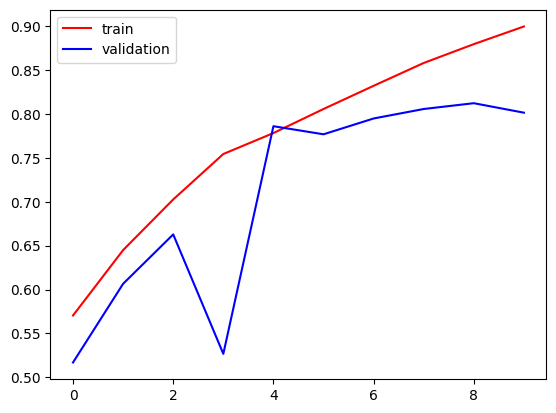

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

Above plot shows that, our training is encountering overfitting, so here's few things we can do to reduce overfitting.

1.   Add more data
2.   Data Augmentation - Create more data from the existing dataset.
3. L1/L2 Regularization
4. Add dropout layers
5. Batch normalization
6. Reduce complexity




In [19]:
import cv2

In [50]:
test_image = cv2.imread('/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.300.jpg')

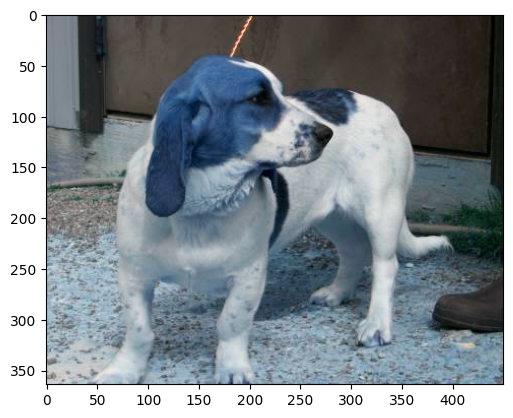

In [51]:
plt.imshow(test_image)

In [52]:
test_image.shape
test_image = cv2.resize(test_image ,(256, 256))

In [53]:
test_input = test_image.reshape((1, 256, 256, 3)) # Our batch contains only 1 image. Image has been converted to a 4D tensor

In [54]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[9.2868706e-26]], dtype=float32)

In [46]:
cat_image = cv2.imread('/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/cats/cat.10.jpg')

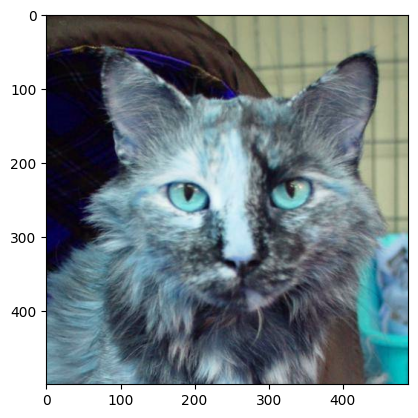

In [47]:
plt.imshow(cat_image)

In [36]:
cat_image = cv2.resize(cat_image ,(256, 256))

In [37]:
test_input = cat_image.reshape((1, 256, 256, 3)) # Our batch contains only 1 image. Image has been converted to a 4D tensor

In [38]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.]], dtype=float32)